# This notebook compares the outputs from VESIcal to the Shishkina Calibration dataset. 


In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

plt.style.use("seaborn-colorblind")
#jtplot.style()
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally

## Loading the calibration dataset of Shishkina et al. (2014) - separated into water-free and CO2-free experiments

In [3]:
myfile_CO2 = v.ExcelFile('Shishkina_Dataset_CalChecks.xlsx',   input_type='wtpercent', sheet_name='CO2')
data_CO2 = myfile_CO2.data
satPs_wtemps_Shish_CO2= myfile_CO2.calculate_saturation_pressure(temperature="Temp", model='ShishkinaCarbon')
satPs_wtemps_Shish_CO2.head()


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,Reference,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
1,50.175018,0.920092,18.281828,0.0,0,9.370937,0.170017,7.000700,0,0,...,0.230023,0.150015,0,0.018,500,1250,"Shishkina et al., 2010 1",457.395687,ShishkinaCarbon,The pressure is outside the calibration range ...
2,47.327420,2.353128,14.179890,0.0,0,10.825606,0.173174,10.370063,0,0,...,0.835310,0.468588,0,0.027,500,1250,This study,388.720580,ShishkinaCarbon,The pressure is outside the calibration range ...
3,43.666155,2.638655,12.659386,0.0,0,11.548572,0.195076,12.074159,0,0,...,1.006180,0.698166,0,0.075,500,1250,This study,525.467523,ShishkinaCarbon,
4,42.355137,2.260615,11.805435,0.0,0,11.009208,0.188385,13.322978,0,0,...,0.962855,1.130308,0,0.115,500,1250,This study,543.222277,ShishkinaCarbon,
5,48.342182,1.773014,16.397876,0.0,0,10.477812,0.200341,5.970149,0,0,...,1.963338,0.591005,0,0.022,500,1250,This study,393.640444,ShishkinaCarbon,The pressure is outside the calibration range ...


In [4]:
myfile_H2O = v.ExcelFile('Shishkina_Dataset_CalChecks.xlsx',   input_type='wtpercent', sheet_name='H2O')
data_H2O = myfile_H2O.data
satPs_wtemps_Shish_H2O= myfile_H2O.calculate_saturation_pressure(temperature="Temp", model='ShishkinaWater')
satPs_wtemps_Shish_H2O.head()

/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:540: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  normalized = pd.Series({})
/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3204: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,Reference,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
1,50.175018,0.920092,18.281828,0,0,9.370937,0.170017,7.000700,0,0,...,0.230023,0.150015,2.300000,0,500,1250,"Shishkina et al., 2010",572.577503,ShishkinaWater,
2,50.175018,0.920092,18.281828,0,0,9.370937,0.170017,7.000700,0,0,...,0.230023,0.150015,2.970000,0,1000,1250,"Shishkina et al., 2010",919.644091,ShishkinaWater,
3,46.237383,2.700445,14.656611,0,0,11.751120,0.164913,8.719756,0,0,...,1.061625,0.556580,3.376645,0,1000,1250,This study B2518,1082.631259,ShishkinaWater,
4,47.327420,2.353128,14.179890,0,0,10.825606,0.173174,10.370063,0,0,...,0.835310,0.468588,3.310677,0,1000,1250,This study B2507,1052.983249,ShishkinaWater,
5,43.666155,2.638655,12.659386,0,0,11.548572,0.195076,12.074159,0,0,...,1.006180,0.698166,3.133135,0,1000,1250,This study A2549,952.341463,ShishkinaWater,


In [5]:
myfile_Comb = v.ExcelFile('Shishkina_Dataset_CalChecks.xlsx',   input_type='wtpercent', sheet_name='Table2_Text')
data_Comb = myfile_Comb.data
satPs_wtemps_Shish_Comb= myfile_Comb.calculate_saturation_pressure(temperature="Temp", model='Shishkina')
satPs_wtemps_Shish_Comb.head()

/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:197: RuntimeWarning: invalid value encountered in double_scalars
  molCations[cation] = molCations[cation]/total


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,Sample,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
1,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,3.38,0.0000,1000.0,1250.0,B2518,1084.418701,Shishkina,
2,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,3.10,0.0000,1000.0,1250.0,B2518,937.671367,Shishkina,
3,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,2.29,0.0284,1000.0,1250.0,B2518,927.664572,Shishkina,
4,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,0.00,0.0648,1000.0,1250.0,B2518,794.701595,Shishkina,
5,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,0.88,0.0706,1000.0,1250.0,B2518,856.204946,Shishkina,


# X-Y comparison plot of pressures for Carbon-only experiments and model

Text(4200, 4000, '1:1 line')

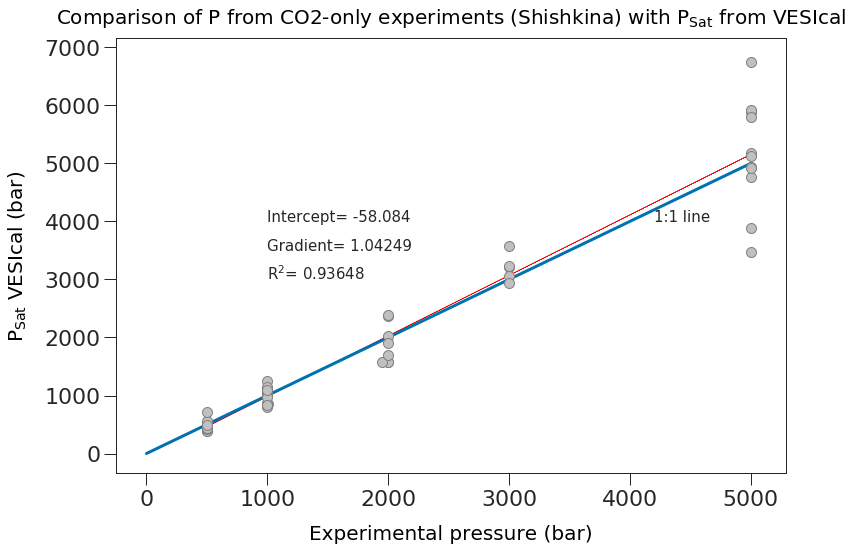

In [6]:
# Linear regression
X=data_CO2['Press'].values.reshape(-1, 1) # Convert MPa from their supplement to bars
Y=satPs_wtemps_Shish_CO2['SaturationP_bars_VESIcal'].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)
# Plotting
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of P from CO2-only experiments (Shishkina) with P$_{Sat}$ from VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X,Y_pred, color='red', linewidth=0.5, zorder=1)
plt.scatter(data_CO2['Press'], satPs_wtemps_Shish_CO2['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
plt.plot([0, 5000], [0, 5000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y, Y_pred), 5)) 
plt.text(1000, 4000, I, fontsize=15)
plt.text(1000, 3500, G, fontsize=15)
plt.text(1000, 3000, R, fontsize=15)
one='1:1 line'
plt.text(4200, 4000, one, fontsize=15)

# Comparison of water model with water-bearing experiments

Text(6000, 6000, '1:1')

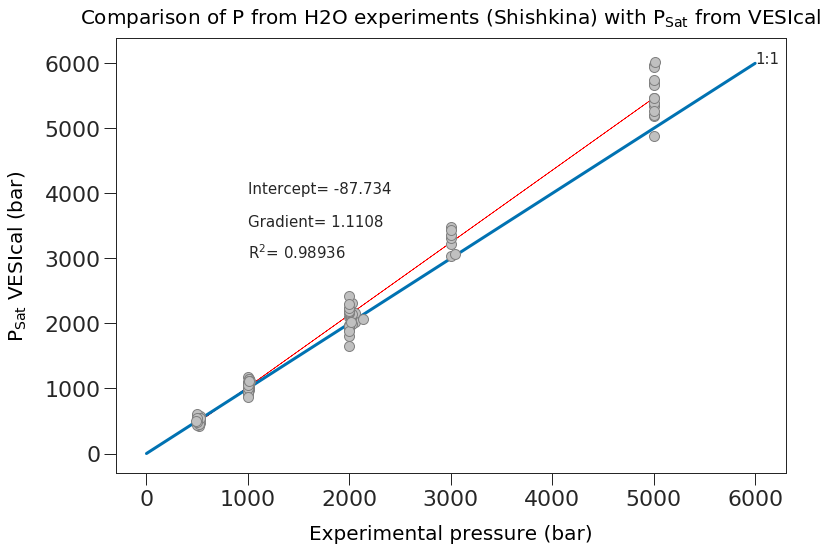

In [17]:
XH2O=data_H2O['Press'] # Convert MPa from their supplement to bars
YH2O=satPs_wtemps_Shish_H2O['SaturationP_bars_VESIcal']
maskH2O = ~np.isnan(XH2O) & ~np.isnan(YH2O)
X_noNan=XH2O[maskH2O].values.reshape(-1, 1)
Y_noNan=YH2O[maskH2O].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_predH2O=lr.predict(X_noNan)
# Plotting
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of P from H2O experiments (Shishkina) with P$_{Sat}$ from VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_predH2O, color='red', linewidth=0.5, zorder=1)
plt.scatter(data_H2O['Press'], satPs_wtemps_Shish_H2O['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)

I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_predH2O), 5)) 
one='1:1'
plt.plot([0, 6000], [0, 6000])
plt.text(1000, 4000, I, fontsize=15)
plt.text(1000, 3500, G, fontsize=15)
plt.text(1000, 3000, R, fontsize=15)
plt.text(6000, 6000, one, fontsize=15)

# Testing Combined dataset with mixed H2O-CO2 model

Text(6000, 6000, '1:1')

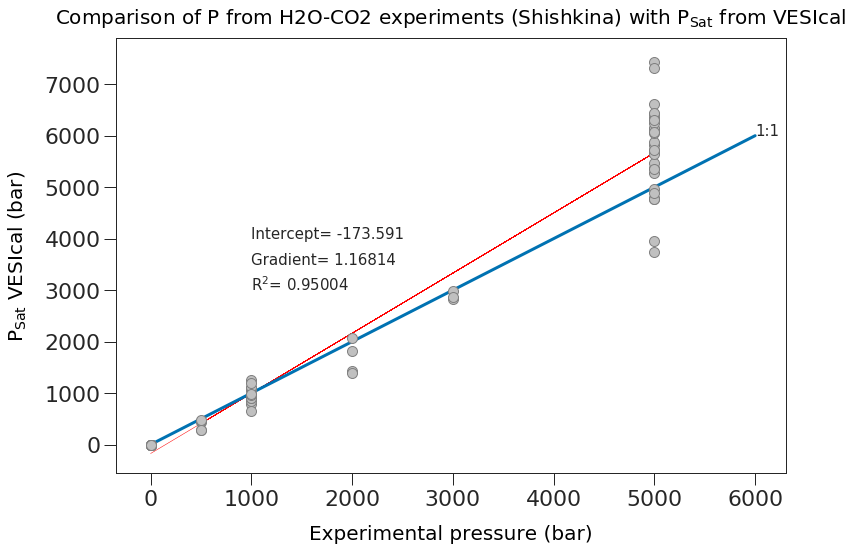

In [18]:
XComb=data_Comb['Press'] # Convert MPa from their supplement to bars
YComb=satPs_wtemps_Shish_Comb['SaturationP_bars_VESIcal']
maskComb = ~np.isnan(XComb) & ~np.isnan(YComb)
X_noNan=XComb[maskComb].values.reshape(-1, 1)
Y_noNan=YComb[maskComb].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_predComb=lr.predict(X_noNan)
# Plotting
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of P from H2O-CO2 experiments (Shishkina) with P$_{Sat}$ from VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_predComb, color='red', linewidth=0.5, zorder=1)
plt.scatter(data_Comb['Press'], satPs_wtemps_Shish_Comb['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)

I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_predComb), 5)) 
one='1:1'
plt.plot([0, 6000], [0, 6000])
plt.text(1000, 4000, I, fontsize=15)
plt.text(1000, 3500, G, fontsize=15)
plt.text(1000, 3000, R, fontsize=15)
plt.text(6000, 6000, one, fontsize=15)

# Checking what Cation fractions means!


In [9]:
# Removed CO2 and H2O
oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5']
oxideMass = {'SiO2': 28.085+32, 'MgO': 24.305+16, 'FeO': 55.845+16, 'CaO': 40.078+16, 'Al2O3': 2*26.982+16*3, 'Na2O': 22.99*2+16,
			 'K2O': 39.098*2+16, 'MnO': 54.938+16, 'TiO2': 47.867+32, 'P2O5': 2*30.974+5*16, 'Cr2O3': 51.996*2+3*16,
			 'NiO': 58.693+16, 'CoO': 28.01+16, 'Fe2O3': 55.845*2+16*3}
CationNum = {'SiO2': 1, 'MgO': 1, 'FeO': 1, 'CaO': 1, 'Al2O3': 2, 'Na2O': 2,
			 'K2O': 2, 'MnO': 1, 'TiO2': 1, 'P2O5': 2, 'Cr2O3': 2,
			 'NiO': 1, 'CoO': 1, 'Fe2O3': 2}

In [10]:
Dixonfile = v.ExcelFile('Shishkina_Dataset_CalChecks.xlsx', input_type='wtpercent', sheet_name=1)
Dixondata = v.normalize_AdditionalVolatiles(Dixonfile)
Dixondata
#normalize_FixedVolatiles

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp,Reference
Label,,,,,,,,,,,,,,,,,,,
1,50.175018,0.920092,18.281828,0.0,0.0,9.370937,0.170017,7.000700,0.0,0.0,11.371137,2.330233,0.230023,0.150015,2.300000,0,500,1250,"Shishkina et al., 2010"
2,50.175018,0.920092,18.281828,0.0,0.0,9.370937,0.170017,7.000700,0.0,0.0,11.371137,2.330233,0.230023,0.150015,2.970000,0,1000,1250,"Shishkina et al., 2010"
3,46.237383,2.700445,14.656611,0.0,0.0,11.751120,0.164913,8.719756,0.0,0.0,10.636866,3.514701,1.061625,0.556580,3.376645,0,1000,1250,This study B2518
4,47.327420,2.353128,14.179890,0.0,0.0,10.825606,0.173174,10.370063,0.0,0.0,9.942222,3.524599,0.835310,0.468588,3.310677,0,1000,1250,This study B2507
5,43.666155,2.638655,12.659386,0.0,0.0,11.548572,0.195076,12.074159,0.0,0.0,11.827748,3.685904,1.006180,0.698166,3.133135,0,1000,1250,This study A2549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,49.640000,0.870000,16.070000,0.0,0.0,8.630000,0.150000,9.760000,0.0,0.0,12.440000,2.280000,0.080000,0.080000,9.380000,0,5009,1200,Berndt et al.2002
96,49.879445,0.843882,15.059273,0.0,0.0,7.795861,0.060277,5.515371,0.0,0.0,11.462729,4.651396,4.731766,0.000000,10.070000,0,5000,1250,"Vetere et al., 2014"
97,50.147522,0.855625,15.283242,0.0,0.0,7.641621,0.039339,5.930370,0.0,0.0,11.132966,7.110543,1.858773,0.000000,9.900000,0,5000,1250,"Vetere et al., 2014"


In [11]:
for ind,row in Dixondata.iterrows():
    for ox in oxides:
        Dixondata.loc[ind, ox + 'molar']=((row[ox]*CationNum[ox])/oxideMass[ox]) # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 
        #oxide_molar[ind, ox]=ox+'molar'
    Dixondata.loc[ind,'sum']=sum(Dixondata.loc[ind, ox+'molar'] for ox in oxides)
    for ox in oxides:
        Dixondata.loc[ind, ox + 'norm']=Dixondata.loc[ind, ox+'molar']/Dixondata.loc[ind, 'sum']
            # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 
Dixondata.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Cr2O3norm,FeOnorm,MnOnorm,MgOnorm,NiOnorm,CoOnorm,CaOnorm,Na2Onorm,K2Onorm,P2O5norm
Label,,,,,,,,,,,,,,,,,,,,,
1,50.175018,0.920092,18.281828,0.0,0.0,9.370937,0.170017,7.000700,0.0,0.0,...,0.0,0.072597,0.001334,0.096675,0.0,0.0,0.112861,0.041851,0.002718,0.001176
2,50.175018,0.920092,18.281828,0.0,0.0,9.370937,0.170017,7.000700,0.0,0.0,...,0.0,0.072597,0.001334,0.096675,0.0,0.0,0.112861,0.041851,0.002718,0.001176
3,46.237383,2.700445,14.656611,0.0,0.0,11.751120,0.164913,8.719756,0.0,0.0,...,0.0,0.090539,0.001287,0.119756,0.0,0.0,0.104996,0.062780,0.012477,0.004341
4,47.327420,2.353128,14.179890,0.0,0.0,10.825606,0.173174,10.370063,0.0,0.0,...,0.0,0.082744,0.001341,0.141287,0.0,0.0,0.097358,0.062455,0.009739,0.003626
5,43.666155,2.638655,12.659386,0.0,0.0,11.548572,0.195076,12.074159,0.0,0.0,...,0.0,0.087732,0.001501,0.163502,0.0,0.0,0.115116,0.064915,0.011660,0.005369


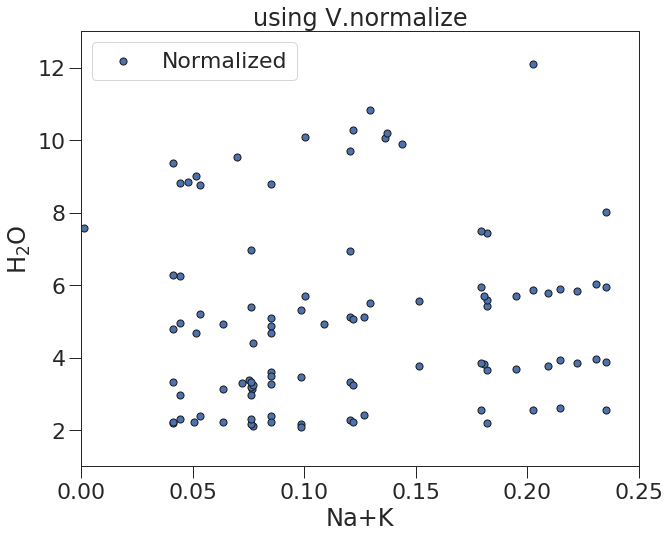

In [12]:
fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
plt.xlim([0, 0.25])
plt.ylim([1, 13])
plt.title('using V.normalize')
plt.scatter(Dixondata['Na2Onorm']+Dixondata['K2Onorm'], Dixondata['H2O'], edgecolor='k', facecolor='b', s=50, label='Normalized')
plt.xlabel('Na+K')
plt.ylabel('H$_2$O')
plt.legend()

# Their graph below

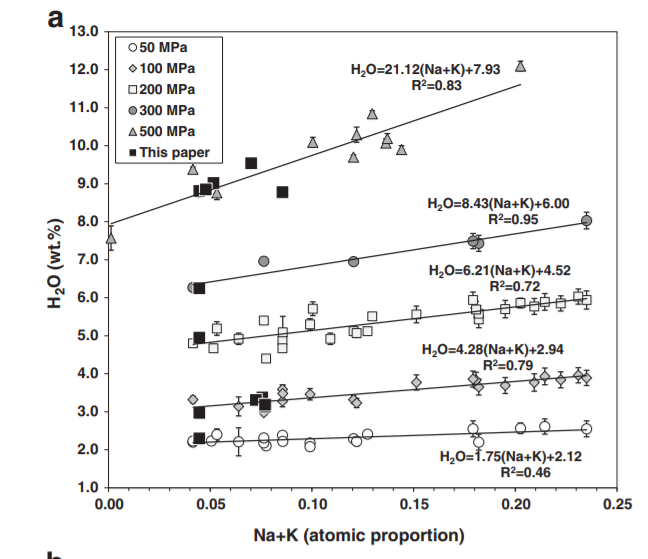